In [1]:
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
import matplotlib.dates as mdates

plt.rcParams.update({'font.size':18})

#use the keyword to look at accuracies for either buy or sell signals
keyword = 'buy' #'sell' 

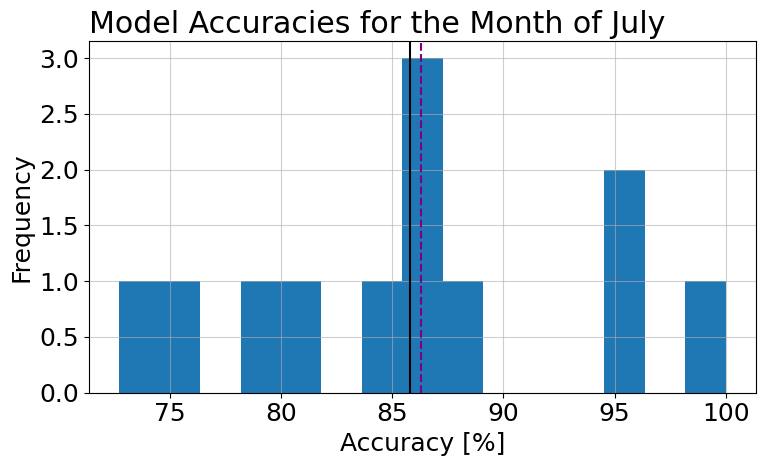

Mean: 85.81%
Median: 86.28%


In [4]:
#This will compute the accuracy of stocks predicted to move up vs. the reality if they actually moved up
#within 10 trading days after initlization.

years = np.arange(2010,2022)
month = '07'
acc = []
for yr in years:
    files = sorted(glob('backtest_output/psa_{}{}*_*{}*'.format(yr,month,keyword)))
    d = pd.concat([pd.read_csv(f) for f in files])
    acc.append((np.where(d['bool'].values)[0].size / len(d))*100)
    
#Make the figure
plt.figure(figsize=(8,5))
plt.grid(alpha=0.6)
ax = plt.subplot(1,1,1)
plt.title('Model Accuracies for the Month of {}'.format(datetime.strptime(month,'%m').strftime('%B')),loc='left')
ax.hist(acc,bins=15)
ax.axvline(x=np.nanmean(acc),color='k')
ax.axvline(x=np.nanmedian(acc),color='purple',linestyle='dashed')
ax.set_xlabel('Accuracy [%]')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.close()

print('Mean: {:.2f}%'.format(np.nanmean(acc)))
print('Median: {:.2f}%'.format(np.nanmedian(acc)))


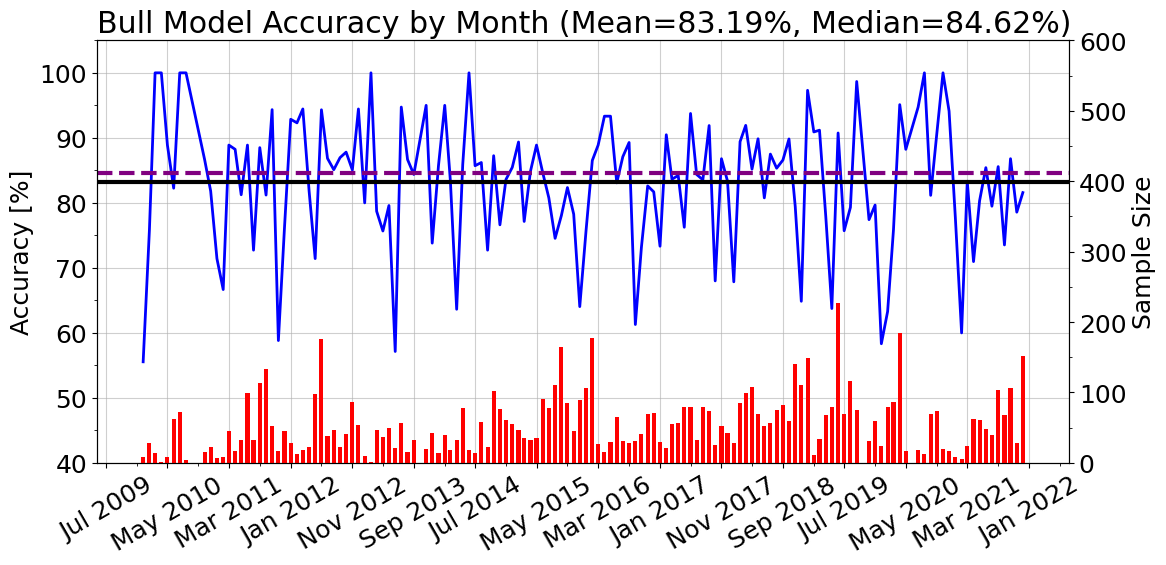

In [5]:
#Make a time series plot of accuracies by month for all data
years = np.arange(2010,2022)
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
dates_plot,acc,sample_size = [],[],[]
for yr in years:
    for mnth in month:
        try:
            files = sorted(glob('backtest_output/psa_{}{}*_*{}*'.format(yr,mnth,keyword)))
            d = pd.concat([pd.read_csv(f) for f in files])
            acc.append((np.where(d['bool'].values)[0].size / len(d))*100)
            dates_plot.append(datetime.strptime('{}{}'.format(yr,mnth),'%Y%m'))
            sample_size.append(len(d))
        except ValueError:
            pass

#Make the figure
plt.figure(figsize=(12,6))
plt.grid(alpha=0.6)
ax = plt.subplot(1,1,1)
plt.title('Bull Model Accuracy by Month (Mean={:.2f}%, Median={:.2f}%)'.format(np.nanmean(acc),np.nanmedian(acc)),loc='left')
ax.plot(dates_plot,acc,color='blue',linewidth=2)
ax.axhline(y=np.nanmean(acc),color='k',linewidth=3)
ax.axhline(y=np.nanmedian(acc),color='purple',linestyle='dashed',linewidth=3)

#Plot the sample size
ax2 = ax.twinx()
ax2.bar(dates_plot,sample_size,color='red',width = 20.4)

#Set the format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

ax.set_ylabel('Accuracy [%]')
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylim([40,105])

ax2.set_ylabel('Sample Size')
ax2.yaxis.set_major_locator(MultipleLocator(100))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax2.yaxis.set_minor_locator(MultipleLocator(50))
ax2.set_ylim([0,600])


plt.tight_layout()
plt.savefig('acc_month.jpg',dpi=300,bbox_inches='tight')
plt.show()
plt.close()
